In [2]:
# Fashion MNIST
# 라벨 : 범주
# 0   : 티셔츠 / 상의
# 1   : 바지
# 2   : 스웨터
# 3   : 드레스
# 4   : 코트
# 5   : 샌들
# 6   : 셔츠
# 7   : 운동화
# 8   : 가방
# 9   : 부츠

# 예제 5.19 : Fashion MNIST 데이터세트 불러오기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


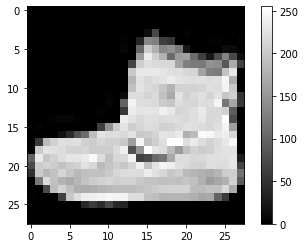

9


In [3]:
# 예제 5.20 : 데이터 확인
import matplotlib.pyplot as plt

plt.imshow(train_X[0], cmap = 'gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [0]:
# 예제 5.21 : 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

In [5]:
# 예제 5.22 : Fashion MNIST 분류 모델
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)), # 2차원 array이므로 데이터를 일렬로 정렬하기 위해
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), # 기본 Adam 옵티마이즈 learning rate (0.001) 사용
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 예제 5.23 : Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5181 - accuracy: 0.8178 - val_loss: 0.4191 - val_accuracy: 0.8502
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3868 - accuracy: 0.8609 - val_loss: 0.3722 - val_accuracy: 0.8669
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3454 - accuracy: 0.8729 - val_loss: 0.3649 - val_accuracy: 0.8665
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3196 - accuracy: 0.8830 - val_loss: 0.3629 - val_accuracy: 0.8693
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3008 - accuracy: 0.8889 - val_loss: 0.3283 - val_accuracy: 0.8847
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.8948 - val_loss: 0.3483 - val_accuracy: 0.8730
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.8995 - val_loss: 0.3288 - val_accuracy:

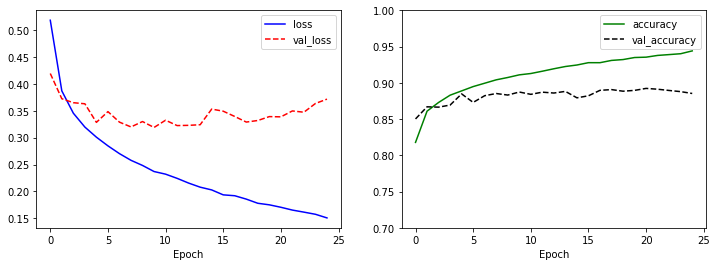

In [7]:
# 예제 5.24 : Fashion MNIST 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [8]:
# 예제 5.25 : Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8829


[0.4027363955974579, 0.8828999996185303]